# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [72]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [4]:
import seaborn as sns

Education

/home/hafsa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

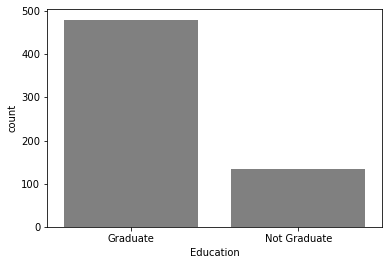

In [5]:
sns.countplot(df['Education'], color='gray')

Dependents

/home/hafsa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

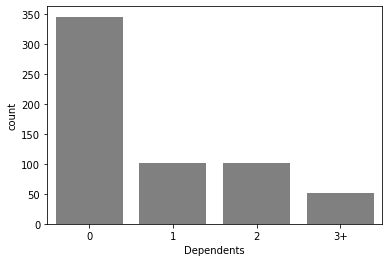

In [5]:
sns.countplot(df['Dependents'], color='gray')

Married

/home/hafsa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

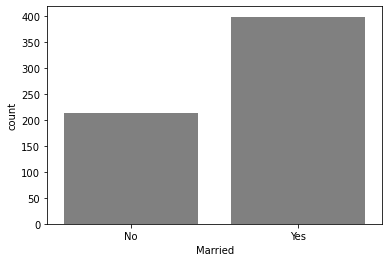

In [6]:
sns.countplot(df['Married'], color='gray')

Self Employed

/home/hafsa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

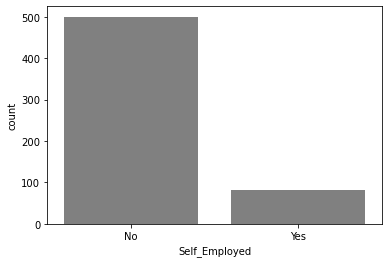

In [7]:
sns.countplot(df['Self_Employed'], color='gray')

Property Area

/home/hafsa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

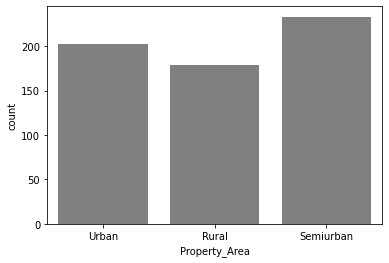

In [8]:
sns.countplot(df['Property_Area'], color='gray')

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [80]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



Look at box plots to understand the distributions. 

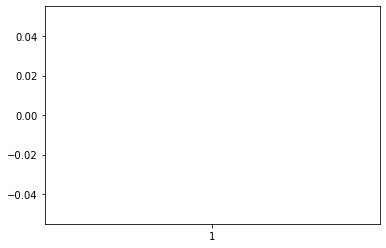

In [81]:
plt.boxplot(df["LoanAmount"])
plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [82]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Replacing empty Married values with Unknown
df['Married'] = df['Married'].fillna('Unknown')

# Replacing empty Dependent fields with median
df['Dependents'] = df['Dependents'].fillna('Unknown')

# Replacing empty Married values with Unknown
df['Self_Employed'] = df['Self_Employed'].fillna('Unknown')

# Replacing empty LoanAmount fields with mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# Replacing empty Loan_Amount_Term fields with median
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

# Replacing empty Credit_History fields with 0
df['Credit_History'] = df['Credit_History'].fillna(0)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

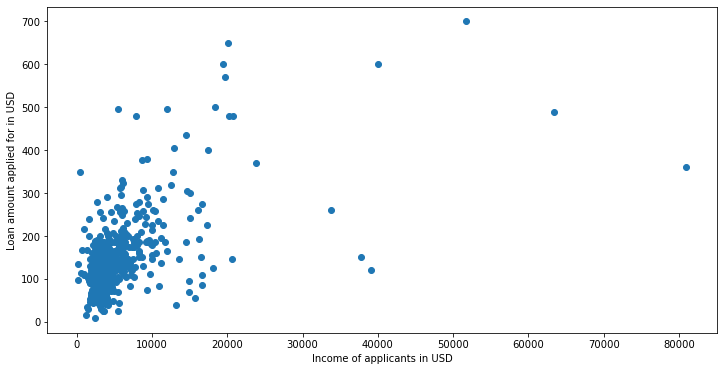

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(df['ApplicantIncome'], df['LoanAmount']),
ax.set_xlabel('Income of applicants in USD')
ax.set_ylabel('Loan amount applied for in USD')
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [8]:
df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [9]:
df["Log_Total_Income"] = df["total_income"].map(lambda i: np.log(i) if i > 0 else 0) 

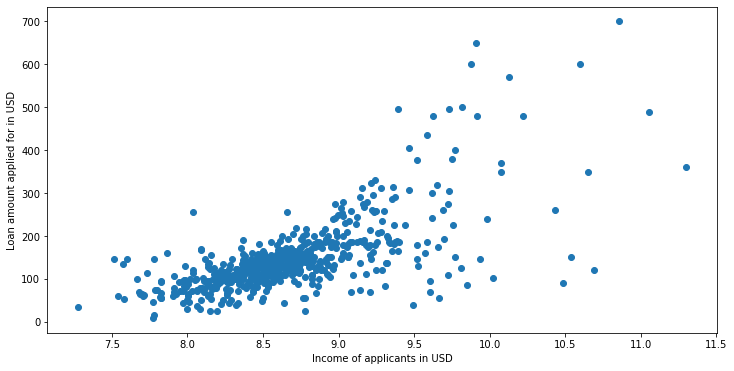

In [10]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(df['Log_Total_Income'], df['LoanAmount']),
ax.set_xlabel('Income of applicants in USD')
ax.set_ylabel('Loan amount applied for in USD')
plt.show()

In [11]:
df.drop(['Loan_ID', 'Gender'], axis=1, inplace=True)

In [12]:
df1 = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [13]:
df1['LoanStatus_Target'] = 0
my_words = {'Y': 1, 'N': 0}
for word in my_words.keys():
    df1.loc[df1['Loan_Status'].str.startswith(word, na=False), ['LoanStatus_Target']] = my_words[word]

In [25]:
df1.drop(['Loan_Status', 'total_income'], axis=1, inplace=True)

In [26]:
df1

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Log_Total_Income,LoanStatus_Target
0,No,0,Graduate,No,146.412162,360.0,1.0,Urban,8.674026,1
1,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,8.714568,0
2,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,8.006368,1
3,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,8.505323,1
4,No,0,Graduate,No,141.000000,360.0,1.0,Urban,8.699515,1
...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,71.000000,360.0,1.0,Rural,7.972466,1
610,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,8.320205,1
611,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,9.025456,1
612,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,8.933664,1


#### Test_Train Split data

In [29]:
# creating target variable
y = df1["LoanStatus_Target"]
X = df1.drop(["LoanStatus_Target"], axis = 1)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 4. Building a Predictive Model

#### Splitting Data into Categorical and Continuous variables

In [30]:
cat_feats = df1.dtypes[df1.dtypes == 'object'].index.tolist()
num_feats = df1.dtypes[~df1.dtypes.index.isin(cat_feats)].index.tolist()

In [31]:
num_feats.pop(4)

'LoanStatus_Target'

In [32]:
num_feats

['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Log_Total_Income']

In [33]:
from sklearn.preprocessing import FunctionTransformer

# Using own function in Pipeline
def numFeat(data):
    return data[num_feats]


def catFeat(data):
    return data[cat_feats]

In [34]:
numFeat(df1)

,LoanAmount,Loan_Amount_Term,Credit_History,Log_Total_Income
0,146.412162,360.0,1.0,8.674026
1,128.000000,360.0,1.0,8.714568
2,66.000000,360.0,1.0,8.006368
3,120.000000,360.0,1.0,8.505323
4,141.000000,360.0,1.0,8.699515
...,...,...,...,...
609,71.000000,360.0,1.0,7.972466
610,40.000000,180.0,1.0,8.320205
611,253.000000,360.0,1.0,9.025456
612,187.000000,360.0,1.0,8.933664


In [35]:
# start two separate pipelines for each type of features
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

#### Create Pipelines

Categorical variables pipeline

In [36]:
#Create toDenseTransformer class

class ToDenseTransformer():

    # here you define the operation it should perform
    def transform(self, X, y=None, **fit_params):
        return X.todense()

    # just return self
    def fit(self, X, y=None, **fit_params):
        return self

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

pipeline_cat = Pipeline([
    ('categorical_features', keep_cat),
    ('ohe', OneHotEncoder()),
    ('to_dense',ToDenseTransformer())])

Numerical variables pipeline

In [38]:
from sklearn.preprocessing import StandardScaler

pipeline_num = Pipeline([
    ('numerical_features', keep_num),
    ('scaling', StandardScaler())])

Feature Union and main Pipeline

In [39]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [41]:
feature_union = FeatureUnion([('num_variables', pipeline_num), 
                              ('cat_variables', pipeline_cat)])

In [42]:
# Main Pipeline
base_model = Ridge()

pipeline = Pipeline(steps=[('features', feature_union),
                           ('classifier', base_model)])

In [43]:
from sklearn import set_config

In [44]:
set_config(display='diagram')

pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('num_variables',
                                                 Pipeline(steps=[('numerical_features',
                                                                  FunctionTransformer(func=<function numFeat at 0x7fe340b729d0>)),
                                                                 ('scaling',
                                                                  StandardScaler())])),
                                                ('cat_variables',
                                                 Pipeline(steps=[('categorical_features',
                                                                  FunctionTransformer(func=<function catFeat at 0x7fe3406c83a0>)),
                                                                 ('ohe',
                                                                  OneHotEncoder()),
                                                                 ('to_dense',
                                                                  <__main__.ToDenseTransformer object at 0x7fe34050a970>)]))])),
                ('classifier', Ridge())])

In [109]:
# fit and predict
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [110]:
# score
pipeline.score(X_test,y_test)

0.2915679891597335

### Use RandomForestRegressor

In [111]:
pipeline_rf = Pipeline(steps=[('features', feature_union),
                           ('rf', RandomForestRegressor())])

In [112]:
# fit and predict
pipeline_rf.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)

In [113]:
pipeline_rf.score(X_test,y_test)

0.19264629629629626

#### Linear Regressor

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
pipeline_reg = Pipeline(steps=[('features', feature_union),
                           ('reg', LinearRegression())])

In [116]:
# fit and predict
pipeline_reg.fit(X_train, y_train)

y_pred_reg = pipeline_reg.predict(X_test)

In [117]:
pipeline_reg.score(X_test,y_test)

0.29100706143713406

#### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
pipeline_clf = Pipeline(steps=[('features', feature_union),
                           ('clf', LogisticRegression())])

In [47]:
set_config(display='diagram')

pipeline_clf

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('num_variables',
                                                 Pipeline(steps=[('numerical_features',
                                                                  FunctionTransformer(func=<function numFeat at 0x7fe340b729d0>)),
                                                                 ('scaling',
                                                                  StandardScaler())])),
                                                ('cat_variables',
                                                 Pipeline(steps=[('categorical_features',
                                                                  FunctionTransformer(func=<function catFeat at 0x7fe3406c83a0>)),
                                                                 ('ohe',
                                                                  OneHotEncoder()),
                                                                 ('to_dense',
                                                                  <__main__.ToDenseTransformer object at 0x7fe34050a970>)]))])),
                ('clf', LogisticRegression())])

In [120]:
# fit and predict
pipeline_clf.fit(X_train, y_train)

y_pred_clf = pipeline_clf.predict(X_test)

In [145]:
pipeline_clf.score(X_test,y_test)

0.827027027027027

Try paramater grid search to improve the results

In [122]:
params_dict = {'clf__penalty' : ['l1', 'l2'], 
               'clf__C' : np.logspace(0, 4, 10)}

In [123]:
from sklearn.model_selection import KFold
k_folds = KFold(n_splits=10)

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
grid = GridSearchCV(estimator=pipeline_clf, param_grid=params_dict, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

In [126]:
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished


In [127]:
print('Final score is: ', grid_result.score(X_test, y_test))

Final score is:  0.827027027027027


#### Pipeline with PCA

In [128]:
from sklearn.decomposition import PCA

In [129]:
pipeline_cat_PCA = Pipeline([
    ('categorical_features', keep_cat),
    ('ohe', OneHotEncoder()),
    ('to_dense',ToDenseTransformer()),
    ('pca',PCA(n_components=3))])

pipeline_num = Pipeline([
    ('numerical_features', keep_num),
    ('scaling', StandardScaler())])

feature_union_PCA = FeatureUnion([('num_variables', pipeline_num), 
                              ('cat_variables', pipeline_cat_PCA)])


pipeline_PCA = Pipeline(steps=[('features', feature_union_PCA),
                           ('clf', LogisticRegression())])

In [130]:
# fit and predict
pipeline_PCA.fit(X_train, y_train)

y_pred_PCA = pipeline_PCA.predict(X_test)

In [131]:
pipeline_PCA.score(X_test,y_test)

0.8216216216216217

#### Grid Search with PCA

In [132]:
params_dict_PCA = {'features__cat_variables__pca__n_components': [3, 5],
               'clf__penalty' : ['l1', 'l2'], 
               'clf__C' : np.logspace(0, 4, 10)}

grid_PCA = GridSearchCV(estimator=pipeline_PCA, param_grid=params_dict, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

In [133]:
grid_result_PCA = grid_PCA.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished


In [134]:
print('Final score is: ', grid_result.score(X_test, y_test))

Final score is:  0.827027027027027


#### GridSearch with PCA and KBest

In [136]:
from sklearn.feature_selection import SelectKBest

In [137]:
pipeline_cat_final = Pipeline([
    ('categorical_features', keep_cat),
    ('ohe', OneHotEncoder()),
    ('to_dense',ToDenseTransformer()),
    ('pca',PCA(n_components=3))])

pipeline_num_final = Pipeline([
    ('numerical_features', keep_num),
    ('select_best', SelectKBest(k=3)),
    ('scaling', StandardScaler())])

feature_union_final = FeatureUnion([('num_variables', pipeline_num_final), 
                              ('cat_variables', pipeline_cat_final)])


pipeline_final = Pipeline(steps=[('features', feature_union_final),
                           ('clf', LogisticRegression())])

In [139]:
params_dict_final = {'features__cat_variables__pca__n_components': [3, 5],
                     'features__num_variables__select_best__k': [1, 3, 6],
               'clf__penalty' : ['l1', 'l2'], 
               'clf__C' : np.logspace(0, 4, 10)}

grid_final = GridSearchCV(estimator=pipeline_final, param_grid=params_dict_final, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

In [142]:
grid_result_final = grid_final.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    4.2s finished


In [143]:
print('Final score is: ', grid_result_final.score(X_test, y_test))

Final score is:  0.827027027027027


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [144]:
import pickle

In [147]:
pickle.dump( grid, open( "mini_project_model.p", "wb" ) )